# Programming Assignment 3
by John Lindblad and Olle Lindgren

## Part 1: Training a convolutional neural network

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)

In [2]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
batch_size = 1600

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

X_train, Y_train = train_generator.next()
img_width, img_height, img_depth = X_train[0].shape

Found 1601 images belonging to 2 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [6]:
val_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)
X_val, Y_val = val_generator.next()

Found 576 images belonging to 2 classes.


In [30]:
def make_convnet():#x_train, y_train, x_val, y_val):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(img_width, img_height, img_depth)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # 2 classes: car or not car
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [33]:
import time
from tensorflow.keras.callbacks import EarlyStopping
def fit_convnet(model, X_train, Y_train, X_val, Y_val, batch_size=10, epochs=10):
    t0 = time.time()
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_val, Y_val))
    model.save_weights('saved_weights')
    t1 = time.time()
    print('Training time: {:.2f} sec.'.format(t1-t0))
    return history

In [102]:
model = make_convnet()
history = fit_convnet(model, X_train, Y_train, X_val, Y_val, batch_size=100, epochs=25)

Train on 1600 samples, validate on 576 samples
Epoch 1/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.7094 - acc: 0.5031 - val_loss: 0.6758 - val_acc: 0.5312
Epoch 2/25
1600/1600 [==============================] - 7s 4ms/step - loss: 0.6615 - acc: 0.6006 - val_loss: 0.6778 - val_acc: 0.5677
Epoch 3/25
1600/1600 [==============================] - 7s 4ms/step - loss: 0.6081 - acc: 0.6656 - val_loss: 0.6650 - val_acc: 0.6302
Epoch 4/25
1600/1600 [==============================] - 7s 4ms/step - loss: 0.5375 - acc: 0.7325 - val_loss: 0.6613 - val_acc: 0.7031
Epoch 5/25
1600/1600 [==============================] - 7s 5ms/step - loss: 0.5080 - acc: 0.7525 - val_loss: 0.6420 - val_acc: 0.7118
Epoch 6/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.4700 - acc: 0.7794 - val_loss: 0.5859 - val_acc: 0.7465
Epoch 7/25
1600/1600 [==============================] - 7s 5ms/step - loss: 0.4378 - acc: 0.7944 - val_loss: 0.6177 - val_acc: 0.7552
Epoch 8/25
1600

In [103]:
import matplotlib.pyplot as plt

def plot_hist(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    return None

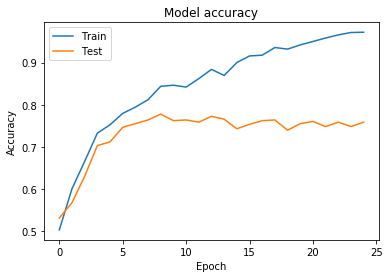

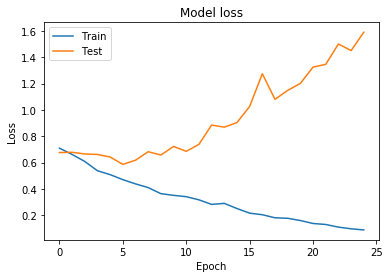

In [104]:
plot_hist(history)

These graphs indicate that this CNN overfits with a peaking accuracy on the validation data after epoch 9 whereafter the accuracy on the training data increases quickly and validation accuracy remains around 75%.

## Part 2: Data augmentation

On this task, we tested some different ways of augmenting the training data in order to reduce overfitting. We did this primarily by testing different values for the parameters in ImageDataGenerator.

In [105]:
data_gen_augmented = ImageDataGenerator(rescale=1.0/255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2)

In [106]:
train_generator_augmented = data_gen_augmented.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1601 images belonging to 2 classes.


In [107]:
X_train_aug, Y_train_aug = train_generator_augmented.next()

In [108]:
model = make_convnet()
history = fit_convnet(model, X_train_aug, Y_train_aug, X_val, Y_val, batch_size=100, epochs=25)

Train on 1600 samples, validate on 576 samples
Epoch 1/25
1600/1600 [==============================] - 9s 6ms/step - loss: 0.7462 - acc: 0.5131 - val_loss: 0.6893 - val_acc: 0.5174
Epoch 2/25
1600/1600 [==============================] - 7s 4ms/step - loss: 0.6778 - acc: 0.5787 - val_loss: 0.6465 - val_acc: 0.6667
Epoch 3/25
1600/1600 [==============================] - 7s 5ms/step - loss: 0.6253 - acc: 0.6556 - val_loss: 0.6101 - val_acc: 0.6649
Epoch 4/25
1600/1600 [==============================] - 7s 5ms/step - loss: 0.5929 - acc: 0.6869 - val_loss: 0.5697 - val_acc: 0.7118
Epoch 5/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.5590 - acc: 0.7188 - val_loss: 0.5575 - val_acc: 0.7170
Epoch 6/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.5561 - acc: 0.7206 - val_loss: 0.5729 - val_acc: 0.7187
Epoch 7/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.5158 - acc: 0.7512 - val_loss: 0.5605 - val_acc: 0.7309
Epoch 8/25
1600

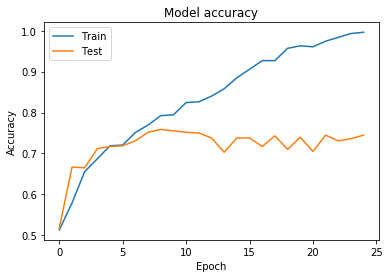

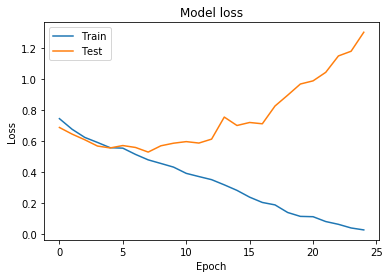

In [109]:
plot_hist(history)

The resulting graph above when using augmentation when preprocessing the data shows that this somewhat minimizes the problem of overfitting (smaller difference between the training and validation accuracy on the peak after epoch 9) but the problem still exists and the accuracy is lower in this case also on the validation data which may indicate that we instead underfit a little bit. A good balance between underfitting and overfitting is difficult to reach here but we did not see huge differences caused by using augmentation when trying out different values of the parameters used in the image preprocessing.

## Interlude: Applying a pre-trained convolutional neural network

In [110]:
# importing the VGG-16 model
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


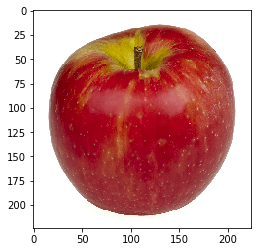

In [111]:
# loading an image
img = load_img('apple.jpg', target_size=(224,224))
plt.imshow(img);

In [112]:
# converting to numpy
from keras.preprocessing.image import img_to_array
arr = img_to_array(img);

# process the array
proc_arr = preprocess_input(arr)

# reshape
your_image = proc_arr.reshape(1, 224, 224, 3)

In [113]:
pred = vggmodel.predict(your_image)
print('Predicted:', decode_predictions(pred, top=10)[0])

Predicted: [('n07742313', 'Granny_Smith', 0.57527566), ('n07768694', 'pomegranate', 0.11990318), ('n07753113', 'fig', 0.079739615), ('n07753592', 'banana', 0.059216265), ('n07747607', 'orange', 0.048092417), ('n03134739', 'croquet_ball', 0.02308206), ('n07749582', 'lemon', 0.017987078), ('n07745940', 'strawberry', 0.01583414), ('n03720891', 'maraca', 0.0074312165), ('n12620546', 'hip', 0.003751107)]


The prediction make sense since the clear number one label (0.57) is Granny Smith (i.e. a sort of apple) with pomegranate (0.12) as number two.

## Part 3: Using VGG-16 as a feature extractor

In [138]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
import time

In [119]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [120]:
import numpy as np

def create_vgg16_features(directory, filename):
    
    vgg_generator = vgg_data_gen.flow_from_directory(
        imgdir + directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)
    
    X_set, Y_set = vgg_generator.next()
    
    #img_width, img_height, img_depth = X_train[0].shape
    
    cnn_features = feature_extractor.predict(X_set) 
    
    #print(cnn_features)
    
    with open(filename, 'wb') as f:
      np.save(f, cnn_features)
    
    return None

In [139]:
dir_val = '/validation'
dir_train = '/train'
file_val = 'val_file'
file_train = 'train_file'
create_vgg16_features(dir_train, file_train)
create_vgg16_features(dir_val, file_val)

Found 1601 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [136]:
def train_on_cnnfeatures():
    
    with open('train_file', 'rb') as f:
        train_data = np.load(f)
    
    with open('val_file', 'rb') as f:
        val_data = np.load(f)
    
    model = Sequential()

    # starting with flattening layer to convert the input
    model.add(Flatten(input_shape=(2,2,512)))
    
    model.add(Dense(32, activation='relu', input_dim=(2*2*512)))
    
    # dropout and output layer
    model.add(Dropout(0.15))
    model.add(Dense(1, activation='sigmoid'))  
    
    model.summary()
    
    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
    # using EarlyStopping
    #es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    t0 = time.time()
    history = model.fit(train_data, Y_train,
              batch_size=10,
              epochs=10,
              verbose=1,
              validation_data=(val_data, Y_val))#,
            #callbacks = [es])
    t1 = time.time()
    print('Training time: {:.2f} sec.'.format(t1-t0))
    
    return model, history

In [137]:
model, history = train_on_cnnfeatures()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 32)                65568     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 33        
Total params: 65,601
Trainable params: 65,601
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 3s 2ms/step - loss: 4.1844 - acc: 0.4975 - val_loss: 1.5546 - val_acc: 0.4792
Epoch 2/10
1600/1600 [==============================] - 1s 482us/step - loss: 0.9859 - ac

In [ ]:
plot_hist(history)

# 3: VGG-16 as Feature Extractor

In [147]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_or_test = 'validation'
batch_size = 1600
vgg16_generator = vgg_data_gen.flow_from_directory(
        imgdir + '/' + train_or_test,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)

Found 576 images belonging to 2 classes.


In [148]:
X_train, Y_train = vgg16_generator.next()

img_width, img_height, img_depth = X_train[0].shape

print(X_train.shape)
print(Y_train.shape)

(576, 64, 64, 3)
(576,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Not a car


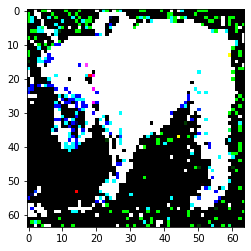

In [149]:
img_nr = 7
plt.imshow(X_train[img_nr])
print('A car' if Y_train[img_nr] > 0 else 'Not a car')

In [150]:
with open('cnn_features/{}/features.npz'.format(train_or_test), 'wb') as f:
    np.savez(f, x = X_train, y = Y_train)
#with open('cnn_features/{}/Y.npy'.format(train_or_test), 'wb') as f:
#    np.save(f, Y_train)

In [151]:
with open('cnn_features/validation/features.npz', 'rb') as f:
    dct = np.load(f)
    #for k in dct.items():
    #    print(k)
    X_val = dct['x']
    Y_val = dct['y']
with open('cnn_features/train/features.npz', 'rb') as f:
    dct = np.load(f)
    #for k in dct.items():
    #    print(k)
    X_train = dct['x']
    Y_train = dct['y']

Basic sanity checks

In [152]:
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)
assert X_val.shape[0] == Y_val.shape[0]
assert X_train.shape[0] == Y_train.shape[0]
assert X_train.shape[0] != X_val.shape[0]

(576, 64, 64, 3)
(576,)
(1600, 64, 64, 3)
(1600,)


## Neural network approach using Keras. Record accuracy is 72%.

In [153]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
import time

def get_model():
    
    transfer_model = Sequential()
    transfer_model.add(Flatten(input_shape=X_train[0].shape))
    transfer_model.add(Dense(32, activation='relu'))
    transfer_model.add(Dropout(.15))
    transfer_model.add(Dense(1, activation='sigmoid'))
    return transfer_model

def fit_transfer_net(model, X_train, Y_train, X_val, Y_val, starting_lr=.001):
    model.compile(
        optimizer = RMSprop(), 
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    t0 = time.time()
    es = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    history = model.fit(X_train, Y_train,
              batch_size=10, # 10 - 200?
              epochs=10, # 10 - 2?
              verbose=1,
              validation_data=(X_val, Y_val),
            callbacks = [es])
    model.save_weights('saved_weights') # don't know how to use this yet but it will probably save time
    t1 = time.time()
    print('Training time: {:.2f} sec.'.format(t1-t0))
    return history

# Do initial fit with relatively high learning rate and then evaluate.
# Keep doing this until results are good.
accuracy = 0
min_worthwhile_accuracy = .69
starting_lr = .0005
while accuracy < min_worthwhile_accuracy:
    model = get_model()
    history = fit_transfer_net(model, X_train, Y_train, X_val, Y_val, starting_lr).history

    accuracy = history['val_acc'][-1]
    print(f"Accuracy: {accuracy:.2f} ({min_worthwhile_accuracy})")
    starting_lr *= .8


Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 4s 2ms/step - loss: 6.9390 - acc: 0.5638 - val_loss: 6.3282 - val_acc: 0.6042
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/step - loss: 6.6618 - acc: 0.5831 - val_loss: 6.3015 - val_acc: 0.6059
Epoch 3/10
1600/1600 [==============================] - 2s 998us/step - loss: 6.6146 - acc: 0.5863 - val_loss: 6.3279 - val_acc: 0.6007
Training time: 9.75 sec.
Accuracy: 0.60 (0.69)
Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 4s 2ms/step - loss: 6.4505 - acc: 0.5944 - val_loss: 5.9137 - val_acc: 0.6302
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/step - loss: 6.2359 - acc: 0.6075 - val_loss: 5.7157 - val_acc: 0.6406
Epoch 3/10
1600/1600 [==============================] - 2s 1ms/step - loss: 5.7857 - acc: 0.6375 - val_loss: 5.7690 - val_acc: 0.6389
Training time: 9.34 sec.
Accuracy: 0.64 (0.69)
Train 

KeyboardInterrupt: 

In [ ]:
prd = (model.predict(X_val) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(prd == Y_val) / len(Y_val)
print(f"Accuracy: {accuracy:.3f}")

In [155]:
del min_worthwile_accuracy

NameError: name 'min_worthwile_accuracy' is not defined

## Scikit-learn approaches. Almost 75%.

In [156]:
# Scikit-learn approach. reshape.
X_train_reshaped = X_train.reshape((X_train.shape[0], np.prod(X_train.shape[1:])))
X_val_reshaped = X_val.reshape((X_val.shape[0], np.prod(X_val.shape[1:])))

print(X_val_reshaped.shape)
print(Y_val.shape)
print(X_train_reshaped.shape)
print(Y_train.shape)
assert X_val_reshaped.shape[0] == Y_val.shape[0]
assert X_train_reshaped.shape[0] == Y_train.shape[0]
assert X_train_reshaped.shape[0] != X_val_reshaped.shape[0]

(576, 12288)
(576,)
(1600, 12288)
(1600,)


## Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_reshaped, Y_train)

rf_prd = (rf.predict(X_val_reshaped) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(rf_prd == Y_val) / len(Y_val)
print(accuracy)

0.7291666666666666


## SVC

In [158]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_reshaped, Y_train)

svc_prd = (svc.predict(X_val_reshaped) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(svc_prd == Y_val) / len(Y_val)
print(accuracy)

0.7465277777777778


## KNN

In [159]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_reshaped, Y_train)

knn_prd = (knn.predict(X_val_reshaped) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(knn_prd == Y_val) / len(Y_val)
print(accuracy)

0.609375


## Conclusions

This dataset is really, really weird. To be honest, we've only t

# 4: Visualization

In [160]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [161]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

## Plotting

It's interesting to see how the images are generally eachothers' opposites. But there aren't really any particular image pairs that are more interesting than any others.

In [ ]:
first_layer_weights = vggmodel.get_weights()[0]

# Plot all (positive, negative) pairs side by side.
fig, ax = plt.subplots(8, 16)
for i in range(8):
    for j in range(8):
        ax[i,j*2].matshow(kernel_image(first_layer_weights, i*8+j, True))
        ax[i,j*2].set_xticks([], [])
        ax[i,j*2].set_yticks([], [])
        ax[i,j*2+1].matshow(kernel_image(first_layer_weights, i*8+j, False))
        ax[i,j*2+1].set_xticks([], [])
        ax[i,j*2+1].set_yticks([], [])
fig.suptitle("Positive, Negative")
plt.show()
